In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Data Collection and Importation

Dataset Link - https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset

In [4]:
df = pd.read_csv("heart_disease.csv", index_col = 0)
#df.drop(['education'], inplace = True, axis = 1)
df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [5]:
df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Data Cleaning and Preprocessing

In [7]:
df.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
df.dtypes

Sex_male             int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [11]:
category_list = ['Sex_male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes' ,'TenYearCHD']
for i in category_list:
    df[i] = df[i].astype('category')

In [12]:
df.dtypes

Sex_male           category
age                   int64
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object

In [13]:
df.to_csv("heart_disease.csv")

In [14]:
df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Variable identification and classificationle

**Dependent Variable - Target**


**Independent Variables - Features**
* Sex_male: Indicates the sex of the person (1 = male, 0 = female).
* age: The age of the person in years.
* currentSmoker: Whether the person is a current smoker (1 = yes, 0 = no).
* cigsPerDay: Number of cigarettes smoked per day (for current smokers).
* BPMeds: Whether the person is on blood pressure medication (1 = yes, 0 = no).
* prevalentStroke: Whether the person has had a stroke before (1 = yes, 0 = no).
* prevalentHyp: Whether the person has hypertension (1 = yes, 0 = no).
* diabetes: Whether the person has diabetes (1 = yes, 0 = no).
* totChol: Total cholesterol level in mg/dL.
* sysBP: Systolic blood pressure in mmHg.
* diaBP: Diastolic blood pressure in mmHg.
* BMI: Body Mass Index (BMI), calculated as weight (kg) divided by height (m²).
* heartRate: Resting heart rate in beats per minute.
* glucose: Blood glucose level in mg/dL.

### Classification
* Sex_male: Categorical (0 = female, 1 = male)
* currentSmoker: Categorical (0 = no, 1 = yes)
* BPMeds: Categorical (0 = no, 1 = yes)
* prevalentStroke: Categorical (0 = no, 1 = yes)
* prevalentHyp: Categorical (0 = no, 1 = yes)
* diabetes: Categorical (0 = no, 1 = yes)
* TenYearCHD: Categorical (0 = no, 1 = yes)
* age: Numeric (continuous, age in years)
* cigsPerDay: Numeric (continuous, number of cigarettes per day)
* totChol: Numeric (continuous, total cholesterol level in mg/dL)
* sysBP: Numeric (continuous, systolic blood pressure in mmHg)
* diaBP: Numeric (continuous, diastolic blood pressure in mmHg)
* BMI: Numeric (continuous, body mass index)
* heartRate: Numeric (continuous, heart rate in beats per minute)
* glucose: Numeric (continuous, blood glucose level in mg/dL)

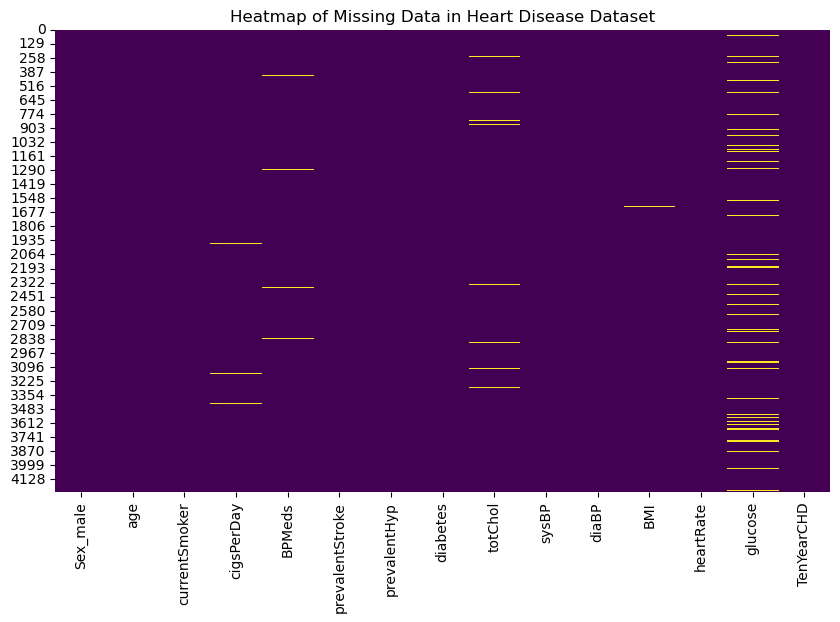

In [18]:
missing_values = df.isnull().sum()

# Plotting heatmap of missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data in Heart Disease Dataset')
plt.show()

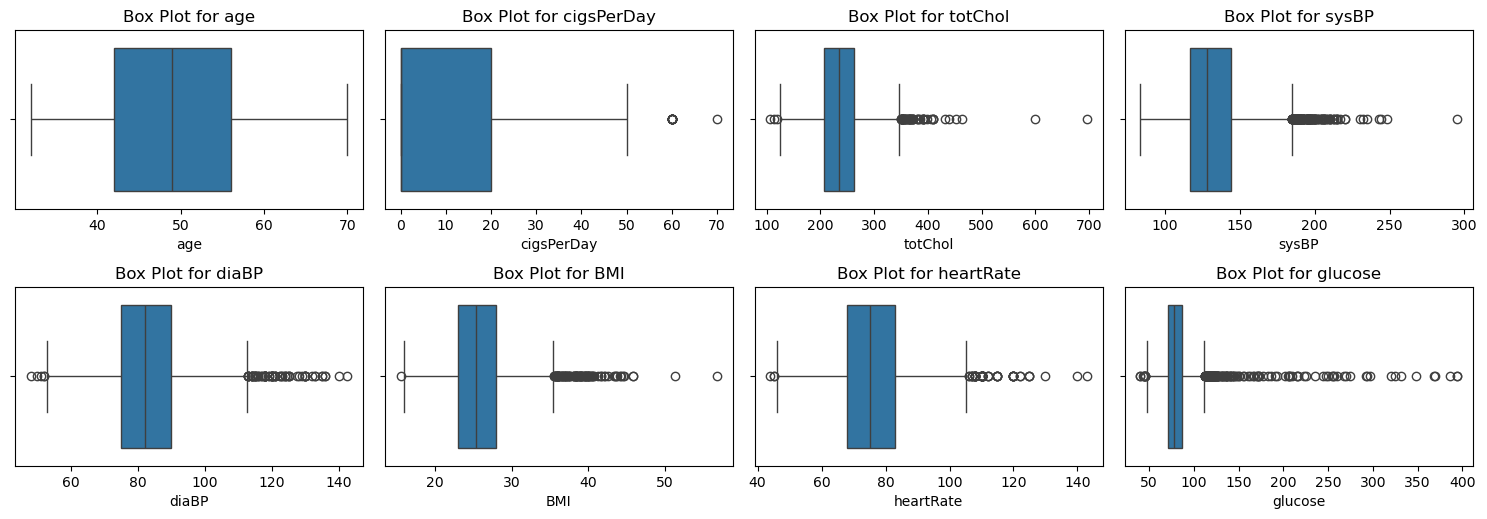

Outliers in age:
Series([], Name: age, dtype: int64)
Outliers in cigsPerDay:
327     60.0
447     45.0
467     50.0
721     60.0
1054    60.0
1360    50.0
1452    60.0
1463    50.0
1468    60.0
1488    60.0
1842    50.0
1849    60.0
2182    50.0
2709    60.0
2710    60.0
2835    50.0
2921    45.0
3008    70.0
3673    60.0
3769    45.0
3928    60.0
Name: cigsPerDay, dtype: float64
Outliers in totChol:
194     464.0
543     439.0
617     398.0
998     372.0
1111    600.0
1150    392.0
1447    391.0
1544    410.0
1691    372.0
1937    410.0
2024    390.0
2206    405.0
2349    380.0
2368    390.0
2488    371.0
2607    382.0
2985    432.0
3160    696.0
3394    382.0
3474    453.0
3806    410.0
3816    391.0
3916    373.0
4001    385.0
Name: totChol, dtype: float64
Outliers in sysBP:
44      206.0
87      200.0
153     212.0
249     200.0
333     204.0
369     215.0
446     209.0
481     295.0
590     220.0
664     205.5
833     200.0
864     244.0
903     213.0
924     206.0
932     199.0
1

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Z-scores and identify outliers
def z_score_outliers(data, threshold=3):
    outliers = {}
    
    # Select only numeric columns for z-score calculation
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    # Calculate Z-scores
    z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()
    
    # Identify outliers based on the z-score
    for col in numeric_data.columns:
        outliers[col] = data[(z_scores[col].abs() > threshold)][col]
        
    return outliers

# Identifying outliers
z_outliers = z_score_outliers(df)

# Visualizing with box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

# Display outliers
for col, outlier_data in z_outliers.items():
    print(f'Outliers in {col}:')
    print(outlier_data)


In [20]:
df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [21]:
df.dropna(inplace = True)

In [22]:
df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [23]:
df.isnull().sum()

Sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [24]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)
scaled_features_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)
scaled_features_df['TenYearCHD'] = df['TenYearCHD'].values


In [25]:
scaled_features_df

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,-1.233910,-0.755527,-0.939971,-1.196195,-1.084431,0.285780,0.359347,-0.204365,0
1,-0.417017,-0.755527,0.293057,-0.515725,-0.162478,0.718738,1.614075,-0.246242,0
2,-0.183620,0.921832,0.180963,-0.220855,-0.246291,-0.115199,-0.058895,-0.497509,0
3,1.333466,1.760511,-0.267411,0.799850,1.010918,0.681838,-0.895380,0.884456,1
4,-0.417017,1.173436,1.077711,-0.107443,0.088964,-0.666236,0.777590,0.130657,0
...,...,...,...,...,...,...,...,...,...
3746,0.049778,-0.671659,1.705434,2.115426,0.759476,0.039781,-0.811732,0.172535,1
3747,0.166477,2.850795,-0.670947,-0.266220,-0.246291,-1.500173,-0.895380,-0.581264,0
3748,0.283176,-0.755527,0.719012,0.051333,0.005150,-1.067215,0.359347,1.051967,0
3749,-1.117211,-0.755527,-1.164158,0.391568,1.262360,-0.051239,-0.728083,-0.413753,0


In [26]:
selected_columns_df = df[['Sex_male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]

# Concatenating the DataFrames horizontally
df = pd.concat([scaled_features_df, selected_columns_df], axis=1)

In [27]:
df.dropna(inplace = True)

In [28]:
df

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Sex_male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,-1.233910,-0.755527,-0.939971,-1.196195,-1.084431,0.285780,0.359347,-0.204365,0,1,0,0.0,0,0,0
1,-0.417017,-0.755527,0.293057,-0.515725,-0.162478,0.718738,1.614075,-0.246242,0,0,0,0.0,0,0,0
2,-0.183620,0.921832,0.180963,-0.220855,-0.246291,-0.115199,-0.058895,-0.497509,0,1,1,0.0,0,0,0
3,1.333466,1.760511,-0.267411,0.799850,1.010918,0.681838,-0.895380,0.884456,1,0,1,0.0,0,1,0
4,-0.417017,1.173436,1.077711,-0.107443,0.088964,-0.666236,0.777590,0.130657,0,0,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,2.150358,-0.755527,-1.365926,1.616414,1.178546,-0.656396,-1.313623,-0.120609,1,0,0,0.0,0,1,0
3747,0.166477,2.850795,-0.670947,-0.266220,-0.246291,-1.500173,-0.895380,-0.581264,0,0,0,0.0,0,1,0
3748,0.283176,-0.755527,0.719012,0.051333,0.005150,-1.067215,0.359347,1.051967,0,0,0,0.0,0,0,0
3749,-1.117211,-0.755527,-1.164158,0.391568,1.262360,-0.051239,-0.728083,-0.413753,0,0,0,0.0,0,0,1


# EDA

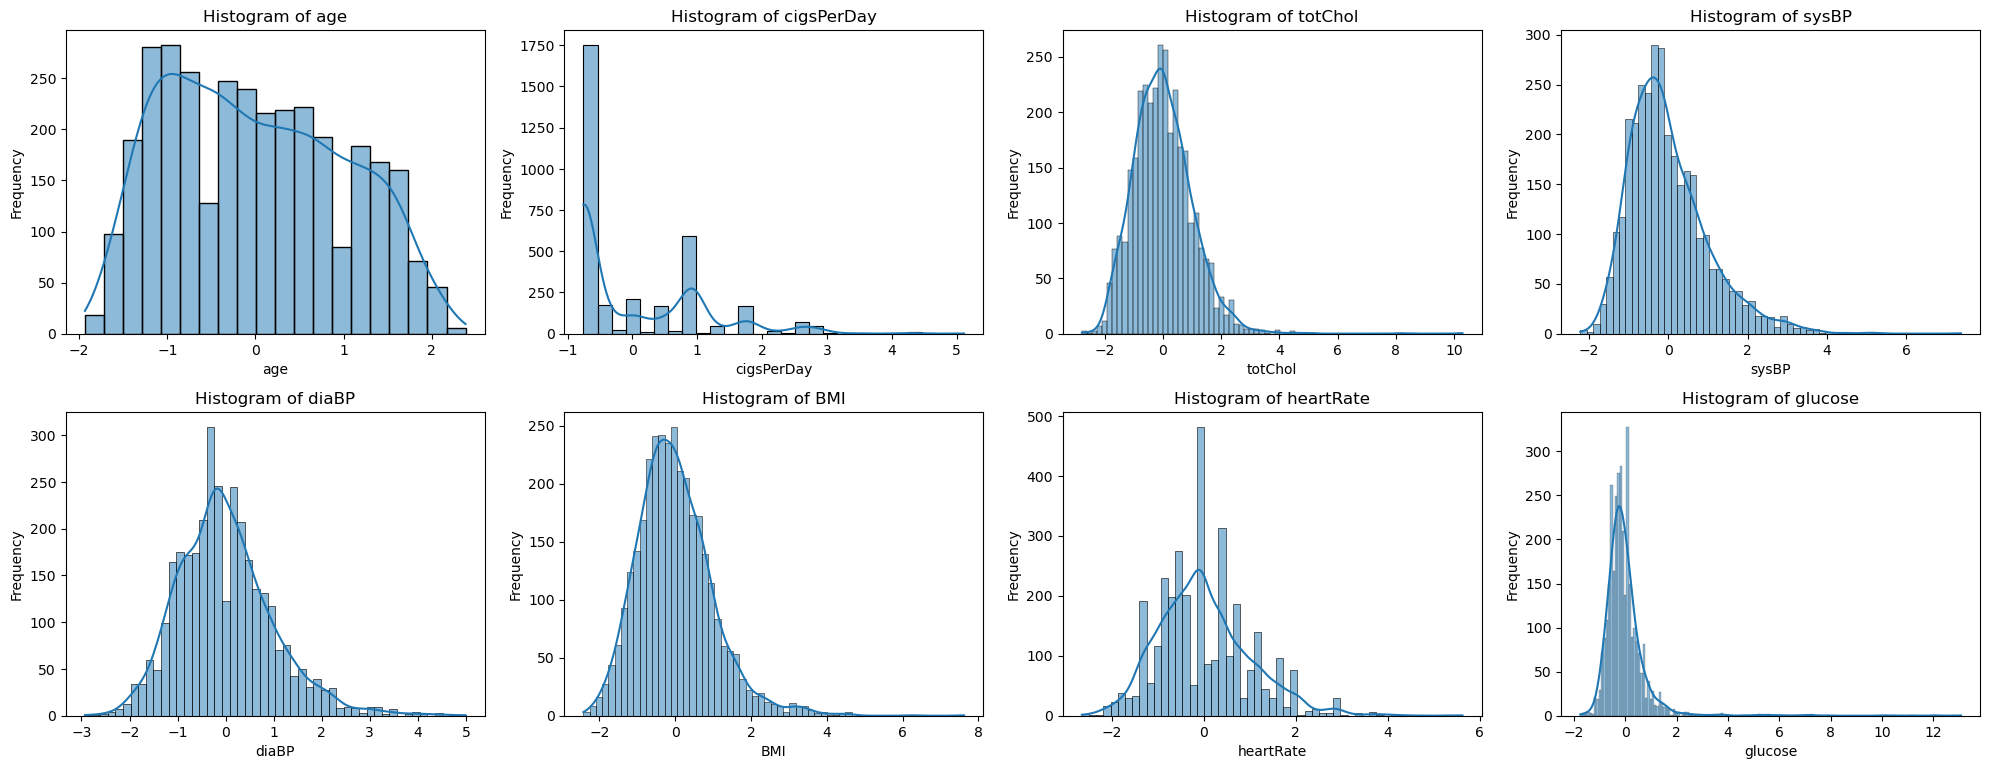

In [30]:
# Univariate Analysis for Numeric Variables
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms and Box Plots
plt.figure(figsize=(20, 15))

for i, col in enumerate(numeric_cols):
    # Histogram
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

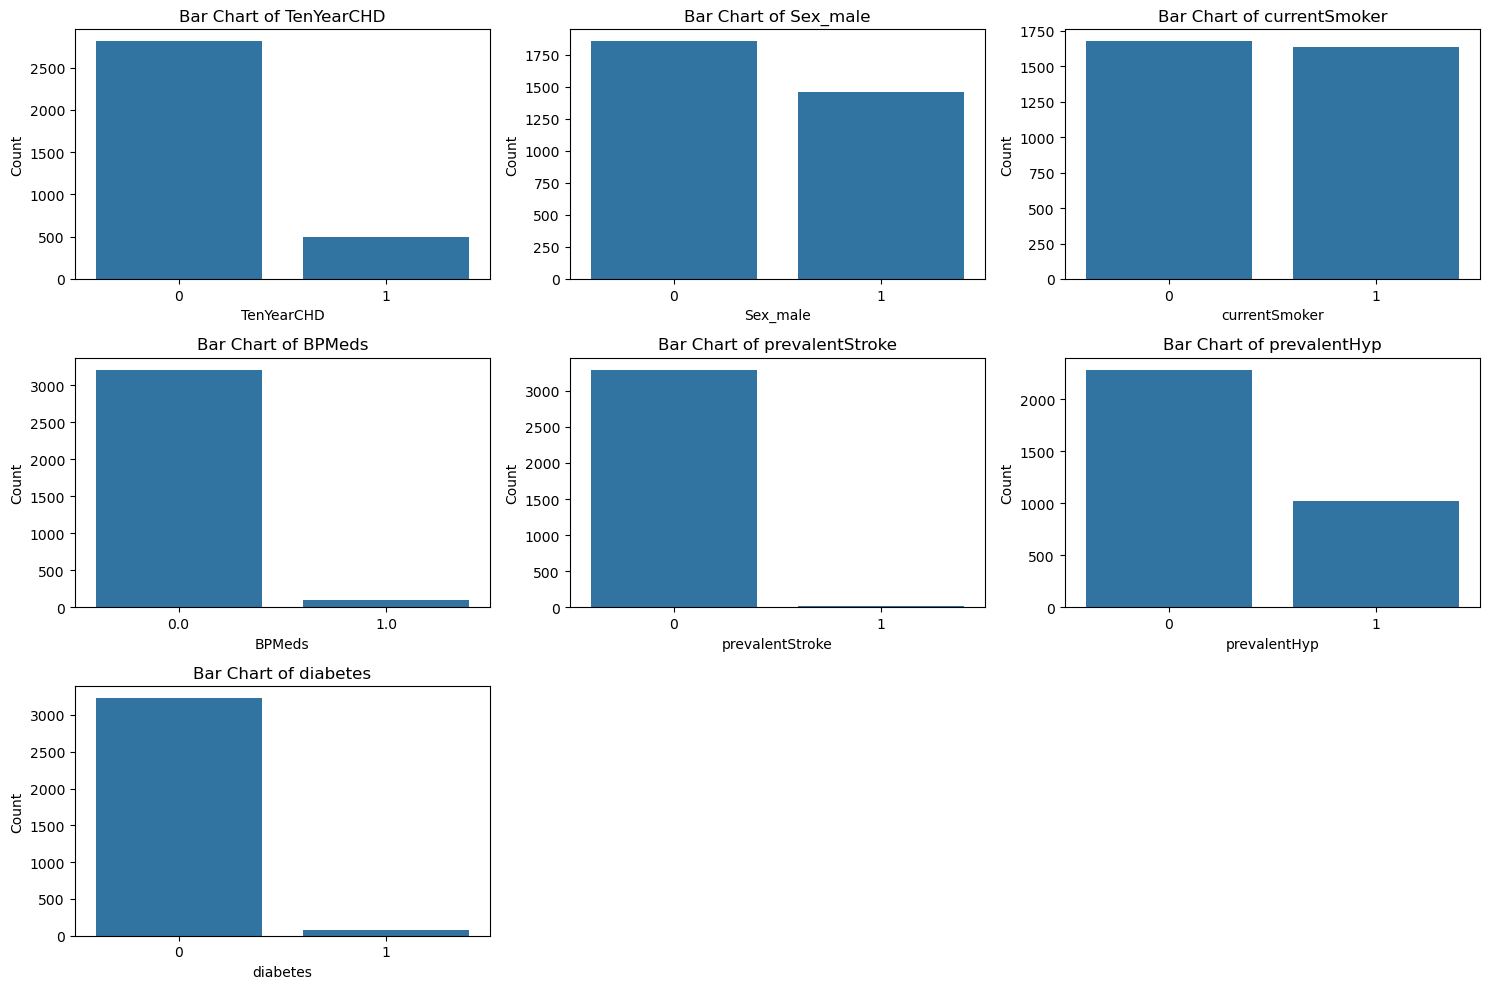

In [31]:
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

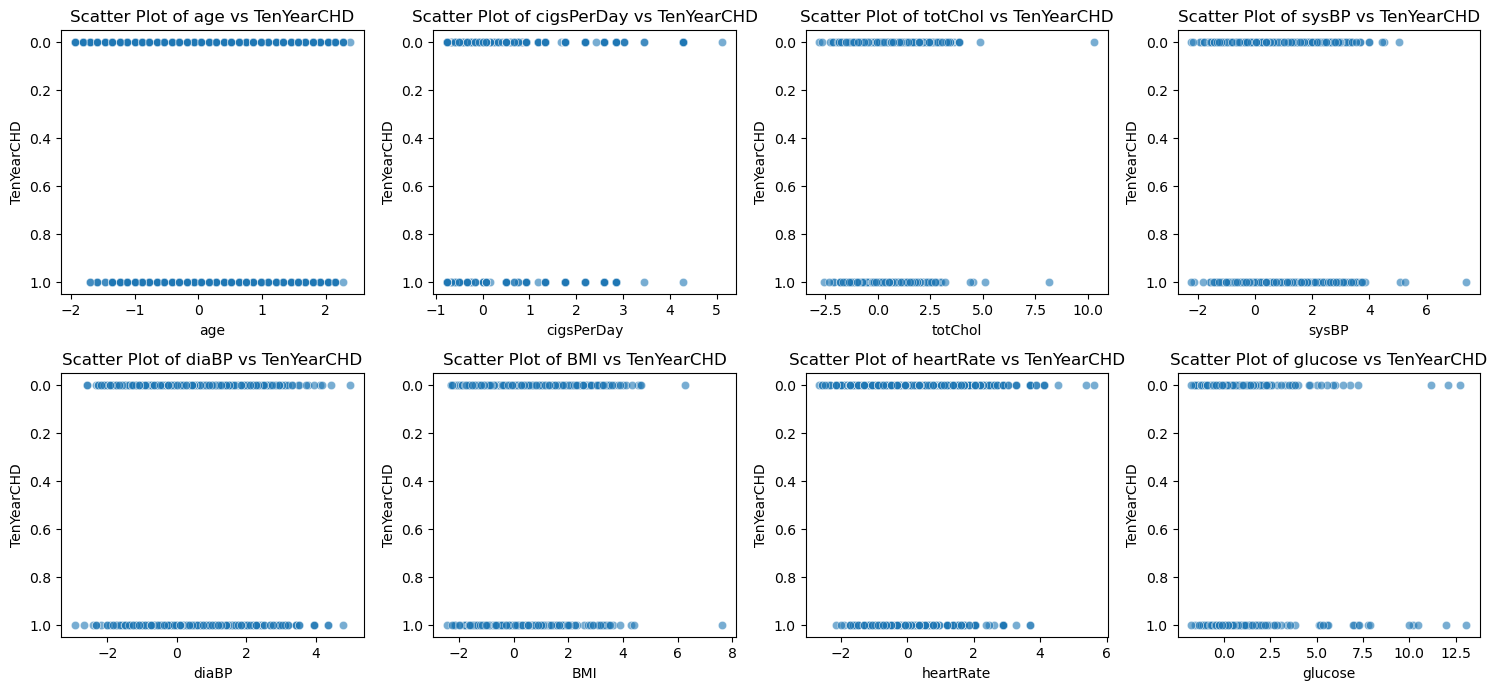

In [32]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    if col != 'TenYearCHD':
        plt.subplot(3, 4, i + 1)
        sns.scatterplot(x=df[col], y=df['TenYearCHD'], alpha=0.6)
        plt.title(f'Scatter Plot of {col} vs TenYearCHD')
        plt.xlabel(col)
        plt.ylabel('TenYearCHD')

plt.tight_layout()
plt.show()

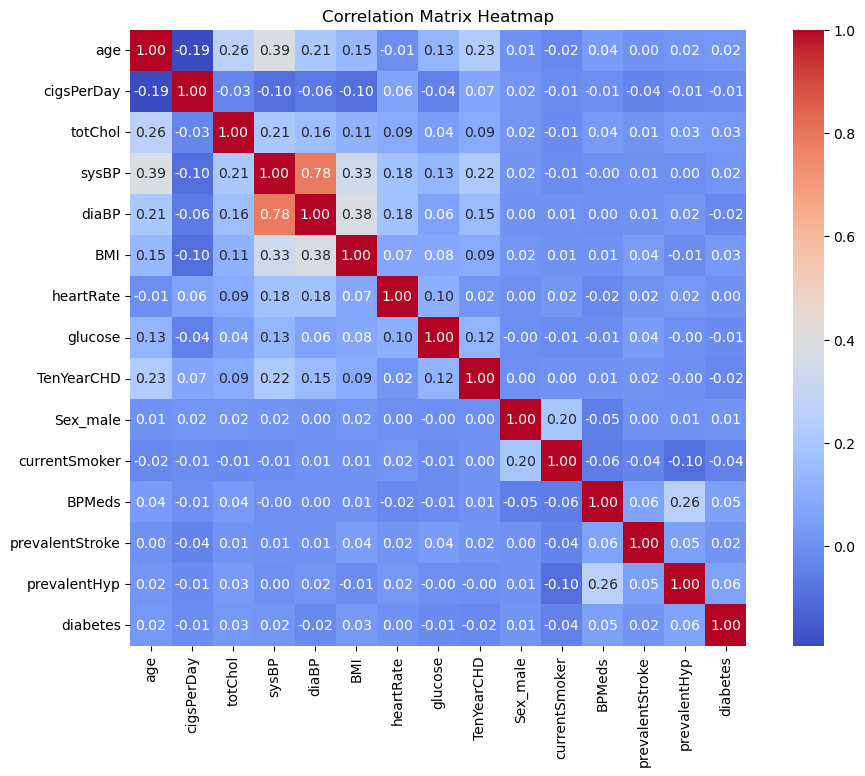

In [33]:
correlation_matrix = df.corr()
# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

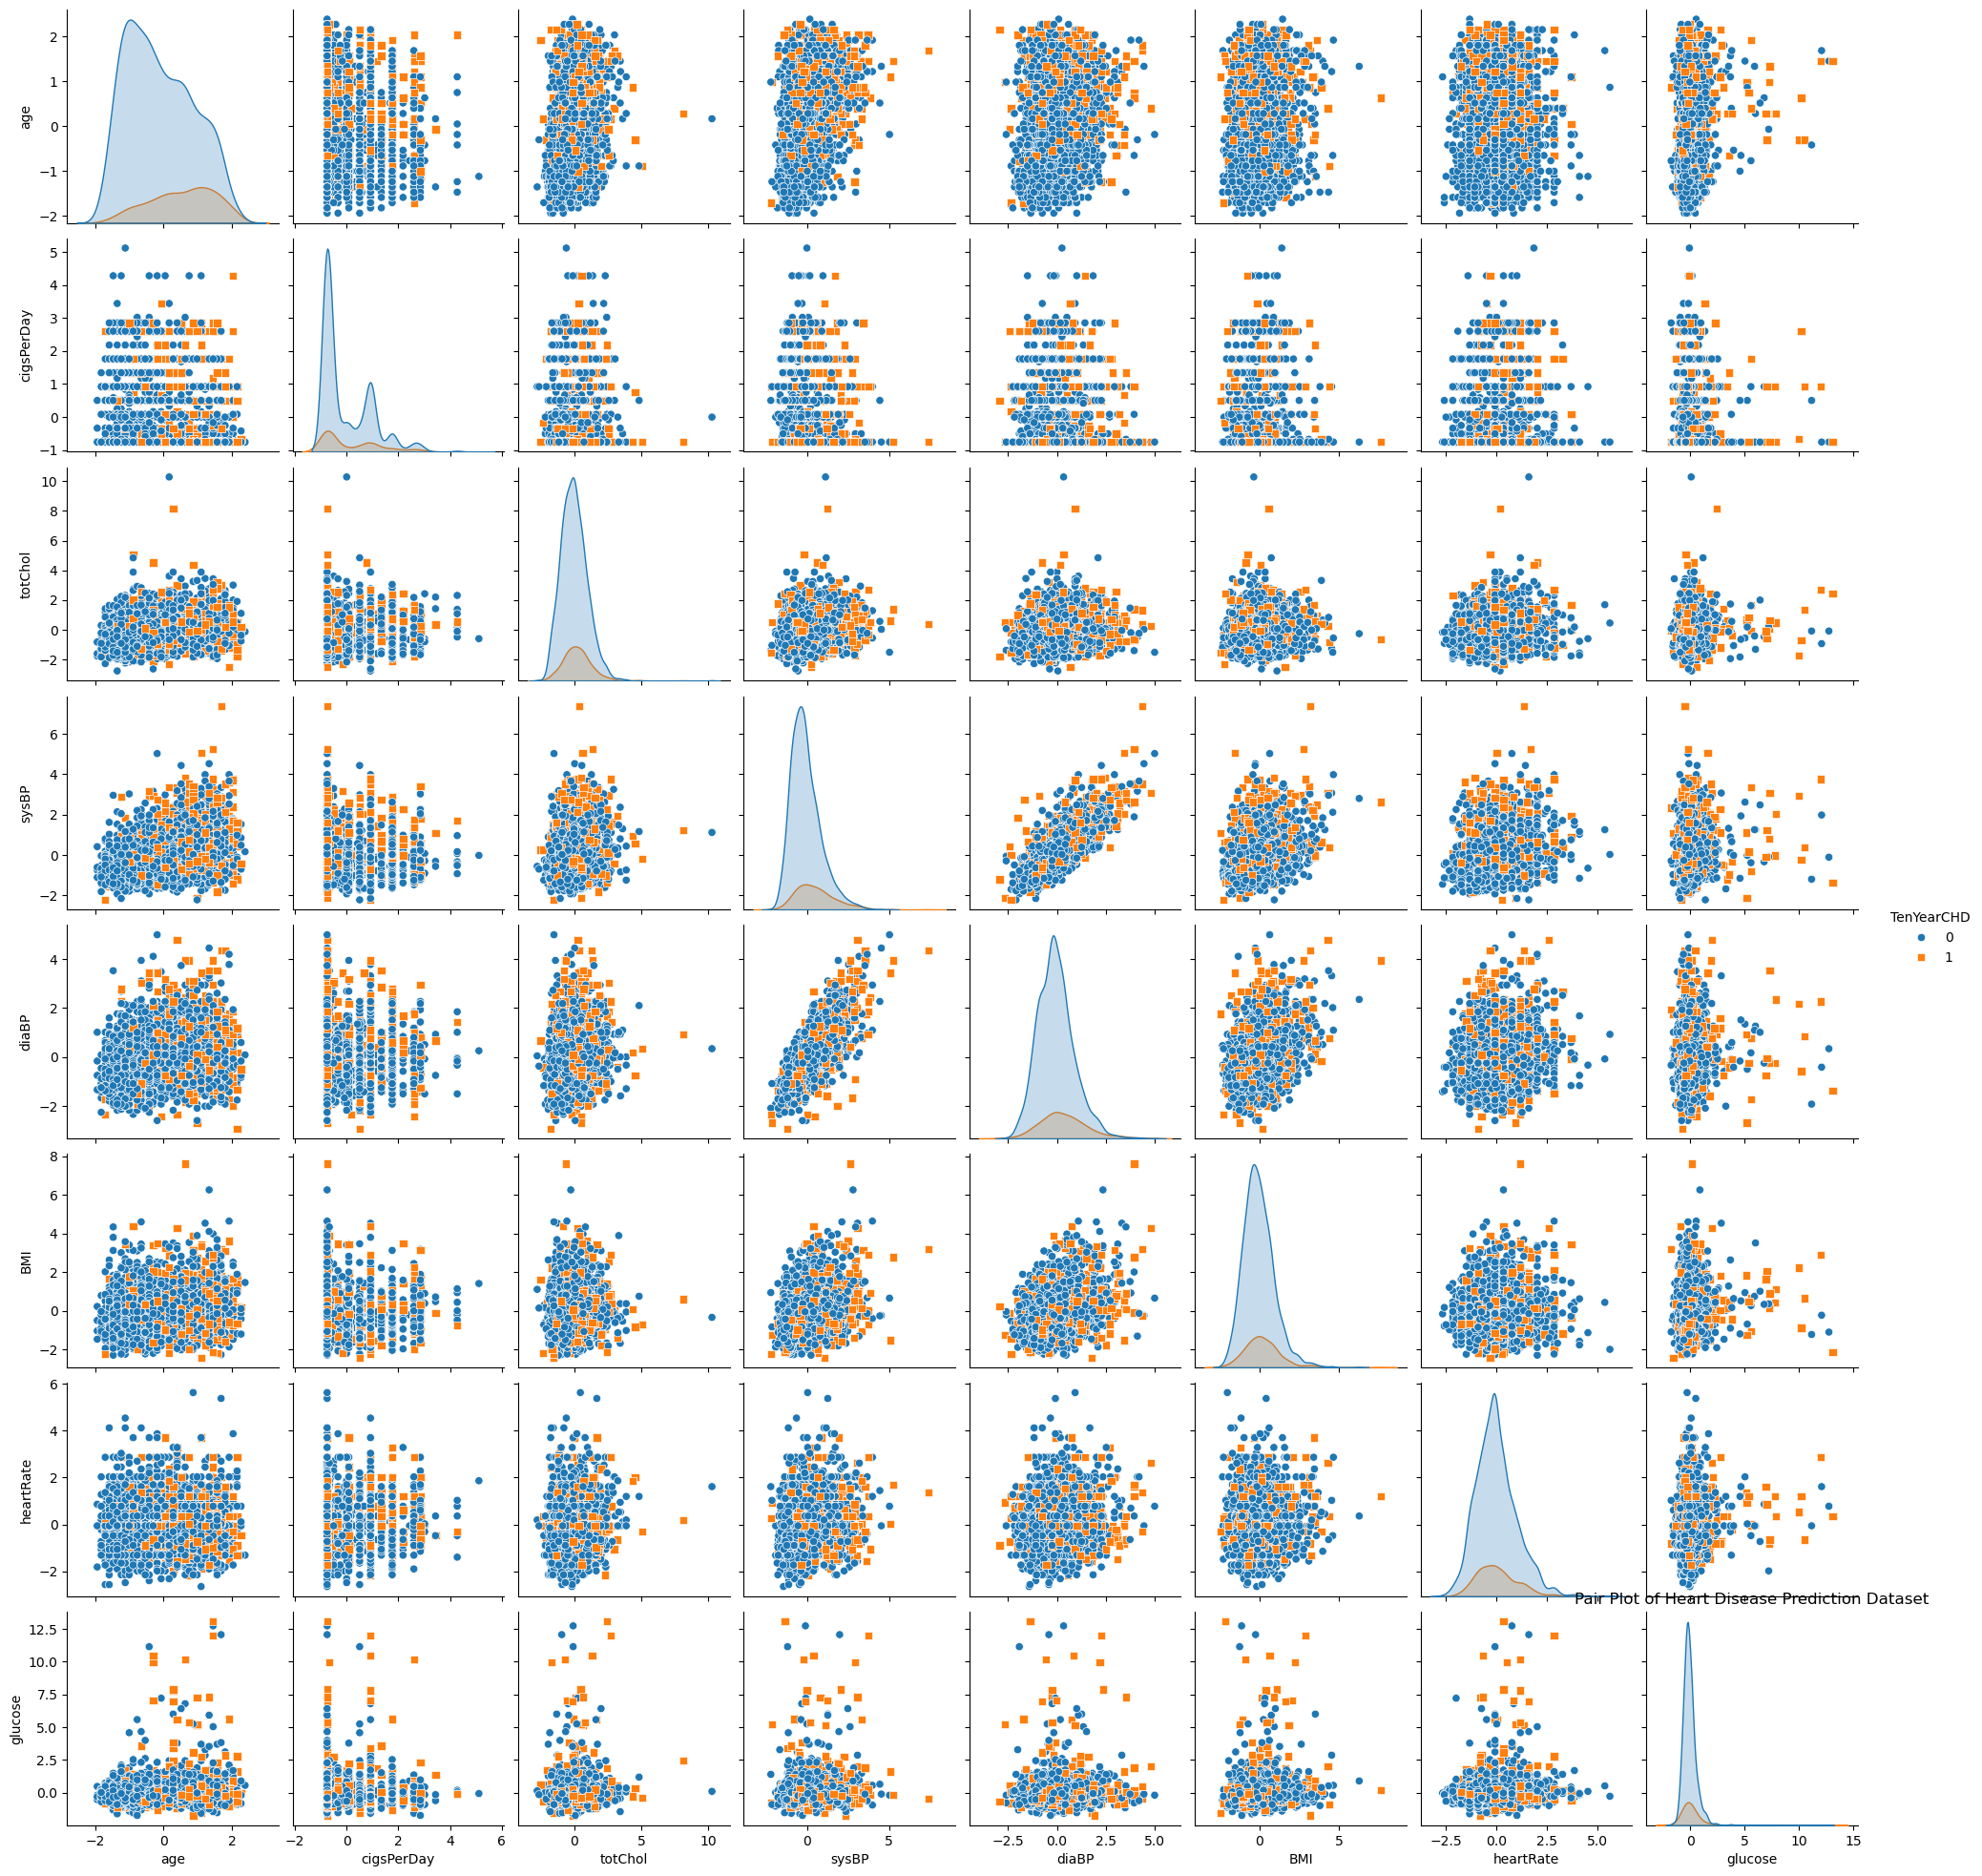

In [34]:
sns.pairplot(df, hue='TenYearCHD', diag_kind='kde', markers=["o", "s"])
plt.title('Pair Plot of Heart Disease Prediction Dataset')
plt.show()

# Hypothesis

* Hypothesis 1: Higher cholesterol levels are positively correlated with the likelihood of heart disease (TenYearCHD).

* Hypothesis 2: Smoking status is associated with increased risk for heart disease.

* Hypothesis 3: There is an interaction between BMI and age that influences heart disease risk.

In [36]:
df

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Sex_male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,-1.233910,-0.755527,-0.939971,-1.196195,-1.084431,0.285780,0.359347,-0.204365,0,1,0,0.0,0,0,0
1,-0.417017,-0.755527,0.293057,-0.515725,-0.162478,0.718738,1.614075,-0.246242,0,0,0,0.0,0,0,0
2,-0.183620,0.921832,0.180963,-0.220855,-0.246291,-0.115199,-0.058895,-0.497509,0,1,1,0.0,0,0,0
3,1.333466,1.760511,-0.267411,0.799850,1.010918,0.681838,-0.895380,0.884456,1,0,1,0.0,0,1,0
4,-0.417017,1.173436,1.077711,-0.107443,0.088964,-0.666236,0.777590,0.130657,0,0,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,2.150358,-0.755527,-1.365926,1.616414,1.178546,-0.656396,-1.313623,-0.120609,1,0,0,0.0,0,1,0
3747,0.166477,2.850795,-0.670947,-0.266220,-0.246291,-1.500173,-0.895380,-0.581264,0,0,0,0.0,0,1,0
3748,0.283176,-0.755527,0.719012,0.051333,0.005150,-1.067215,0.359347,1.051967,0,0,0,0.0,0,0,0
3749,-1.117211,-0.755527,-1.164158,0.391568,1.262360,-0.051239,-0.728083,-0.413753,0,0,0,0.0,0,0,1


Model Comparison Results:
                 Model  Accuracy
0  Logistic Regression  0.840121
1        Random Forest  0.837104
2    Gradient Boosting  0.838612


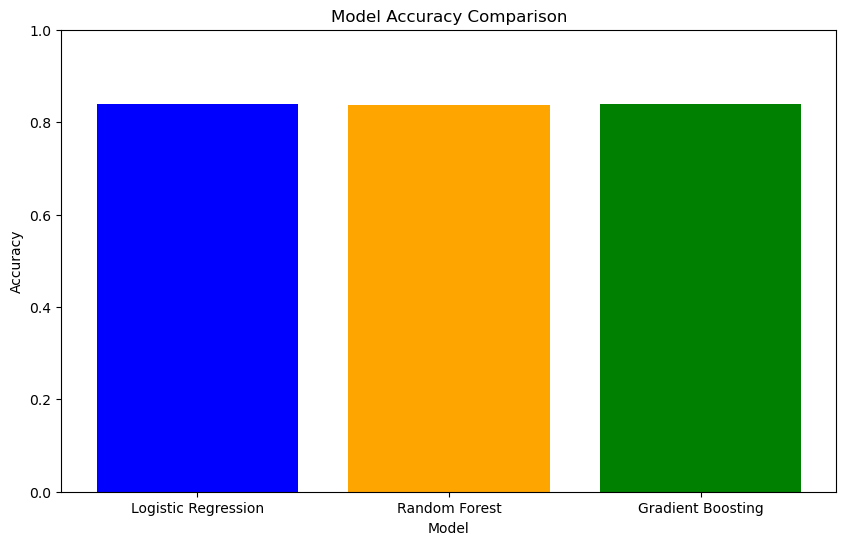

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your data
# For demonstration, let's create a sample DataFrame. Replace this with your actual data.
# Assuming 'TenYearCHD' is the target variable.

# Sample DataFrame creation (replace this with your actual data loading)
# df = pd.DataFrame({
#     'age': np.random.randint(20, 80, size=100),
#     'totChol': np.random.randint(150, 300, size=100),
#     'sysBP': np.random.randint(90, 180, size=100),
#     'diaBP': np.random.randint(60, 120, size=100),
#     'BMI': np.random.uniform(18.5, 40, size=100),
#     'heartRate': np.random.randint(60, 100, size=100),
#     'glucose': np.random.randint(70, 200, size=100),
#     'TenYearCHD': np.random.choice([0, 1], size=100)
# })

# Prepare the data
X = df.drop('TenYearCHD', axis=1)  # Features
y = df['TenYearCHD']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])

# Display results
print("Model Comparison Results:")
print(results_df)

# Optional: Plotting the accuracy for better visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
